# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-24 23:42:48.363007: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-24 23:42:48.363181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 23:42:48.366106: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 23:42:48.392818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 23:42:48.950823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 9.700%
Epoch 2/5: accuracy 10.283%
Epoch 3/5: accuracy 10.650%
Epoch 4/5: accuracy 10.650%
Epoch 5/5: accuracy 10.600%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-6  5  5 ... -5  5 -7]
 [-4 -4  8 ... -4 -4  5]] ...

 [[-3  1 -7 ... -3 -6 -3]
 [ 8  1  1 ... -2 -2 -2]
 [-3 -3 -3 ... -4 -3  5]
 ...
 [-2 -2  1 ... -2 -2 -5]
 [-3 -3 -3 ... -5  1 -3]
 [-4 -2 -5 ... -5  8  1]]

 [[ 1  1 -2 -2 -5 -2 -4  8 -7  1 -2 -4 -4 -2 -4 -7 -2 -2 -6 -4 -5  1  2 -7
  -2  2 -7 -2  1 -3 -6 -2 -2  8 -7 -4 -2 -4 -4 -2 -2 -2 -2 -2 -4 -7 -2 -2
  -7 -7 -2 -2  2 -6  2 -4 -6 -7 -2 -2 -2 -2 -2  1 -4 -2 -4 -2 -2 -2 -2  8
  -2 -2  1  1 -2 -2 -7 -2 -2 -2 -2  8 -7 -3 -4 -6 -2 -2 -4 -2 -4 -6  1 -4
  -2 -2  2  2 -6 -2 -2 -2 -2 -2 -2 -2 -2 -4 -2 -3 -2 -2 -3 -2 -2 -2 -2 -5
  -7 -2 -3 -2 -6 -2 -2 -2]
 [-6 -8 -8  3 -7 -4  1 -7 -7 -8 -8 -6 -8 -2 -4 -7 -3 -8 -3 -3 -3 -2 -3 -7
  -4 -3 -4 -3  7 -4 -4 -6  7 -3 -2 -2 -4 -8  7 -5  7 -3 -8  1 -2 -7 -2 -4
  -6 -6 -7 -2  1  7 -2  7 -6 -3  3 -3 -4 -3 -3 -4 -4 -3 -4 -2 -4  1 -7  7
  -5  1 -2  1 -2 -3 -7  1 -2 -5 -8 -3 -6 -7 -6 -3 -3 -3 -4  3 -4  1 -7 -8
  -6 -3 -3 -3 -3 -3  7 -2 -2 -2  7  1 -2 -4 -8 -3  7  3 -5 -3 -7 -3 -3 -4
   7  1 -3 -6 -4


 [255 255 255   0 255 255   0 255   0 255 255 255 202   0 255   0 105 110
 189 255   0 114   0 255   0   0   0 130   0 255 255  60 205 207 255   0
 255   0 255 255 255   0 255 255  36  74   0 255 255   0 172 255 255 207
   0   0  79 255   0   0 224 137   0   0 255 255  79 128 162  62   0 255
   0 255   0   0 255 255   0   0 109 255   0   0 255   0   0 255 255 255
   0   0   0  85  19   0 255   0 255   0 255 255  98   0   0   0   0 161
 216 113   0  48 255   0 255 163  90   0   0 128   0 199 150 255 255 119
 255 255]

 [  0 255   0   0   0   0   0 255 255 255   0   0 255   0   0 255   0   0
 255   0 255   0   0 255   0 255   0   0   0 255 255   0 255 255   0   0
   0   0 255   0   0   0   0   0   0 255 255   0   0 255   0   0 255   0
 255   0 255 255 255 255 255   0 255 255 255   0 255 255 255 255 255   0
 255 255 255 233 255 255 255   0 255 255 255   0 255 255   0 255 255 255
   0   0   0   0   0   0 255   0 255 255 255 255   0   0 255   0   0 255
   0   0 255 255   0   0   0   0   0 

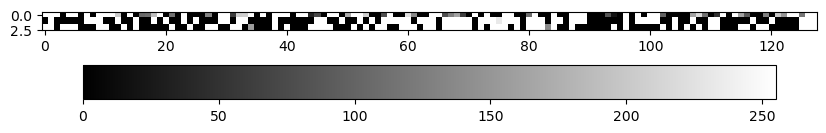


 [255   0 255   0 255   0   0 255   0 255]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
print("\n", model.last_intermediate_outputs[1])
print("\n", model.last_intermediate_outputs[2])
plt.show()
print("\n", model.last_outputs)

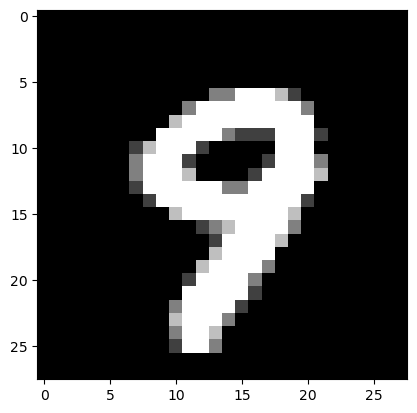

In [9]:
plt.imshow(train_images[N-1].reshape(28,28), cmap="grey")